In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = '/gpfs/commons/home/tlin/output/wightman/new_anno_0203/update_all+enformer/func_enrichment/'
enrichment = pd.read_csv(path + 'enrichment.results', sep = '\t')
enrichment

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p
0,Coding_UCSC_lowfreq_0,0.012407,0.193990,0.062845,15.63500,5.0651,0.018955
1,Coding_UCSC_common_0,0.005057,0.028243,0.015539,5.58520,3.0730,0.066380
2,Coding_UCSC.flanking.500_lowfreq_0,0.035250,0.101350,0.053927,2.87510,1.5298,0.244200
3,Coding_UCSC.flanking.500_common_0,0.018087,0.013415,0.036933,0.74169,2.0420,0.888730
4,Conserved_LindbladToh_lowfreq_0,0.020731,0.225750,0.062409,10.88900,3.0104,0.007914
...,...,...,...,...,...,...,...
428,glass_lab_enformer-zscore_1-neuron_enhancer_ma...,0.005545,0.069992,0.042060,12.62300,7.5857,0.154840
429,glass_lab_enformer-zscore_3-microglia_enhancer...,0.002437,0.080579,0.045299,33.06900,18.5910,0.114550
430,glass_lab_enformer-zscore_2-microglia_enhancer...,0.002352,0.068866,0.048245,29.27800,20.5110,0.189400
431,glass_lab_enformer-zscore_1-microglia_promoter...,0.004328,0.016454,0.019969,3.80190,4.6140,0.537200


## Enrichment

In [3]:
enrichment.iloc[enrichment.Enrichment.abs().sort_values(ascending=False).index]

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p
140,MAF_Adj_ASMC_common_0,1.026900e-07,-0.030032,0.027537,-292460.000000,268160.00000,0.168730
139,MAF_Adj_ASMC_lowfreq_0,1.026900e-07,0.022808,0.027446,222110.000000,267280.00000,0.382870
128,MAF_Adj_Predicted_Allele_Age_common_0,1.180900e-06,-0.102230,0.031762,-86573.000000,26896.00000,0.005002
147,non_synonymous_lowfreq_0,3.247200e-03,0.142320,0.053155,43.828000,16.36900,0.029972
175,Ancient_Sequence_Age_Human_Promoter.flanking.5...,4.047100e-03,0.135910,0.102630,33.584000,25.36000,0.214450
...,...,...,...,...,...,...,...
152,Conserved_Vertebrate_phastCons46way.flanking.5...,1.366300e-01,0.011236,0.089462,0.082240,0.65478,0.190840
81,TFBS_ENCODE_common_0,4.678600e-02,-0.002143,0.117790,-0.045806,2.51760,0.657860
95,UTR_3_UCSC.flanking.500_common_0,5.654900e-03,0.000231,0.021314,0.040824,3.76910,0.781040
259,deepsea-zscore_3-259_1,2.307800e-02,0.000897,0.073792,0.038863,3.19750,0.748770


In [4]:
def bar_plot(df,column,err_col):
    print(column, err_col)
    plt.figure(figsize=(8, 6))
    ax = plt.barh(df['Category'], df[column] , alpha=0.5,  capsize=2, xerr = df[err_col])
    plt.yticks(fontsize=12)
    plt.gca().invert_yaxis()
    return(plt)

def bar_plot_dual(df, n_top=15,title='Top 15'):
    ## enrichment
    top_df = df.iloc[df.Enrichment.abs().sort_values(ascending=False).index].head(n_top)
    ax = bar_plot(top_df, 'Enrichment', 'Enrichment_std_error')
    plt.title(title+' Enrichment', fontsize = 14)
    print(ax)
    
    ##h2
    ax = bar_plot(top_df, 'Prop._h2', 'Prop._h2_std_error')
    plt.title(title+" Enrichement's h2", fontsize = 14)
    print(ax)
    
    ## top h2
    top_df = df.iloc[df['Prop._h2'].abs().sort_values(ascending=False).index].head(n_top)
    ax = bar_plot(top_df, 'Prop._h2', 'Prop._h2_std_error')
    plt.title(title+' H2', fontsize = 14)
    print(ax)


Enrichment Enrichment_std_error
<module 'matplotlib.pyplot' from '/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/matplotlib/pyplot.py'>
Prop._h2 Prop._h2_std_error
<module 'matplotlib.pyplot' from '/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/matplotlib/pyplot.py'>
Prop._h2 Prop._h2_std_error
<module 'matplotlib.pyplot' from '/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/matplotlib/pyplot.py'>


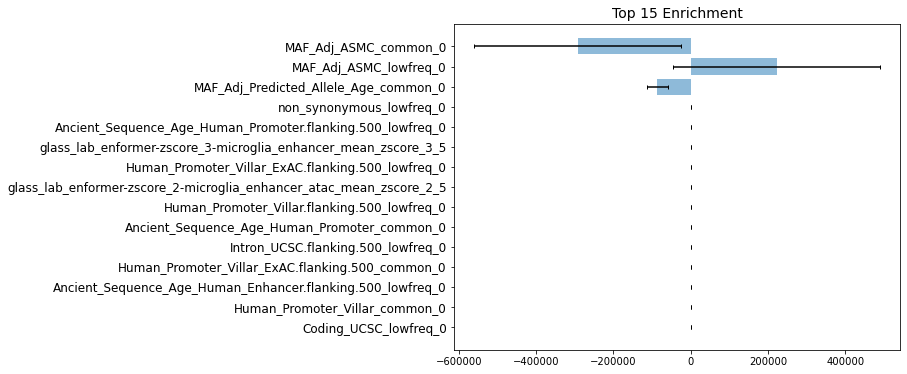

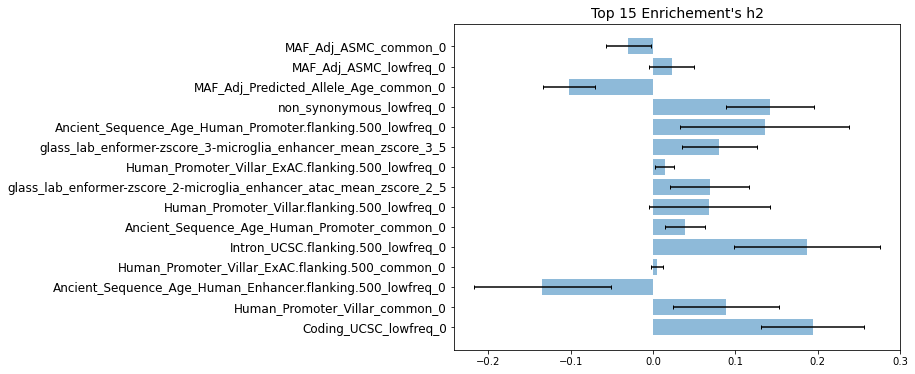

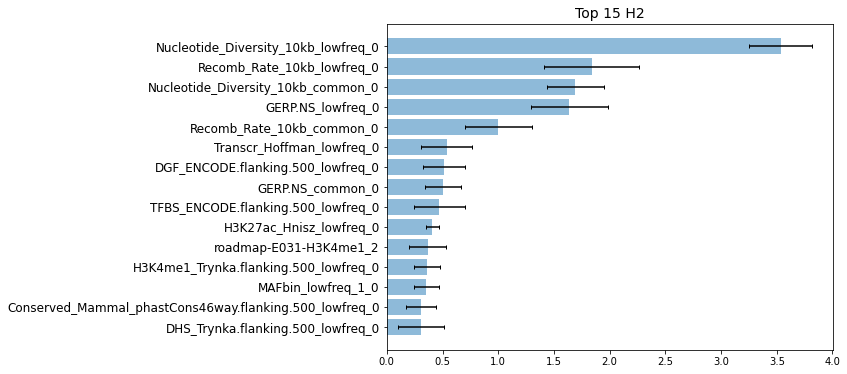

In [5]:
bar_plot_dual(enrichment)

Enrichment Enrichment_std_error
<BarContainer object of 12 artists>
Prop._h2 Prop._h2_std_error
<BarContainer object of 12 artists>


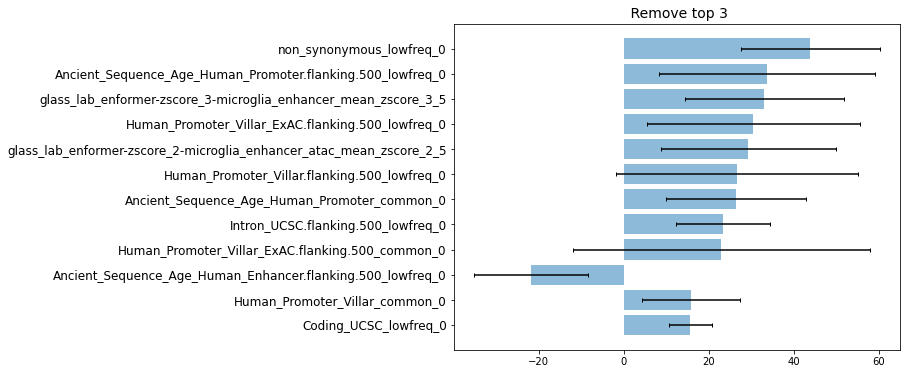

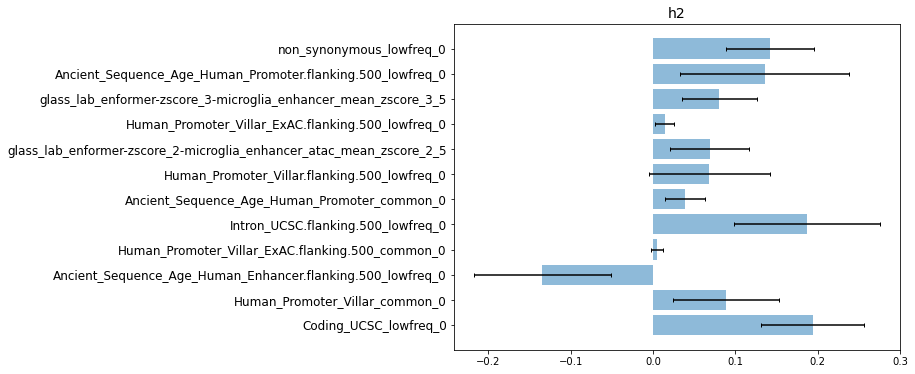

In [8]:
#remove the first 3 columm
top_enrichment = enrichment.iloc[enrichment.Enrichment.abs().sort_values(ascending=False).index].head(15)
top_enrichment = top_enrichment.tail(12)

bar_plot(top_enrichment,'Enrichment', 'Enrichment_std_error')
plt.title(" Remove top 3", fontsize = 14)
print(ax)

bar_plot(top_enrichment,'Prop._h2', 'Prop._h2_std_error')
plt.title("h2", fontsize = 14)
print(ax)


In [ ]:
bar_plot_dual(enrichment.tail(12))

## Try glass_lab

Enrichment Enrichment_std_error
<module 'matplotlib.pyplot' from '/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/matplotlib/pyplot.py'>
Prop._h2 Prop._h2_std_error
<module 'matplotlib.pyplot' from '/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/matplotlib/pyplot.py'>
Prop._h2 Prop._h2_std_error
<module 'matplotlib.pyplot' from '/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/matplotlib/pyplot.py'>


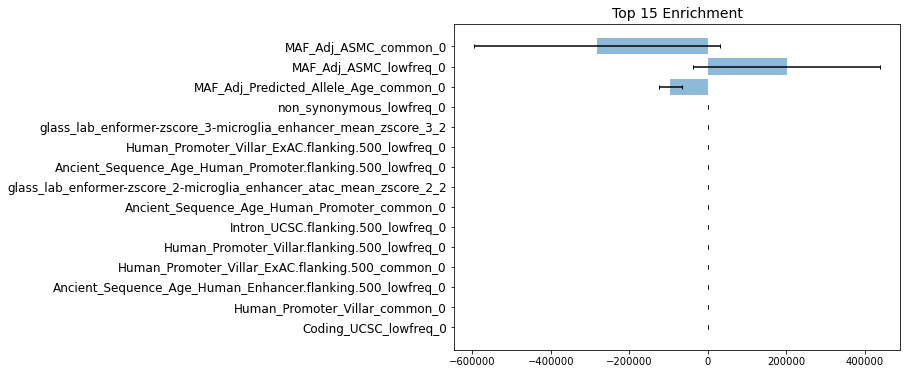

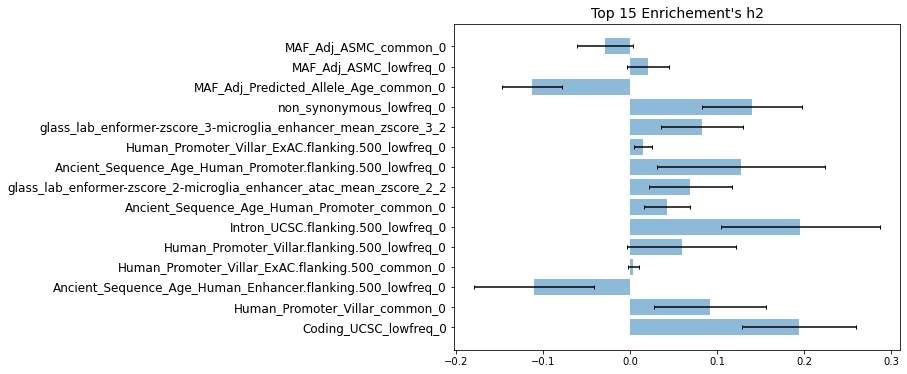

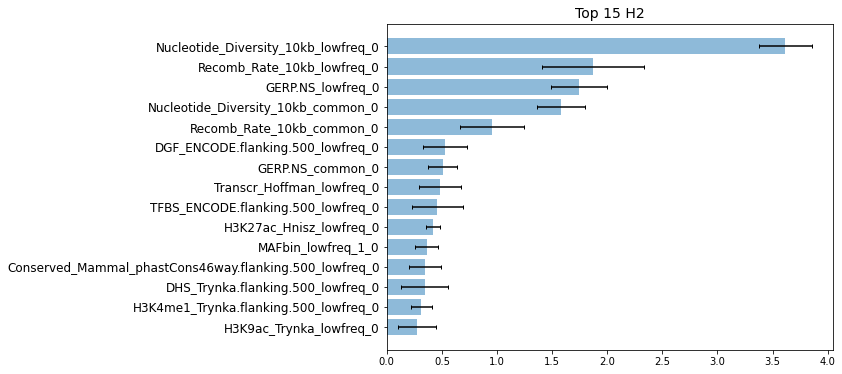

In [101]:
path = '/gpfs/commons/home/tlin/output/wightman/new_anno_0203/glasslab/func_enrichment/'
glasslab = pd.read_csv(path + 'enrichment.results', sep = '\t')
bar_plot_dual(glasslab)